<a href="https://colab.research.google.com/github/eduarda-mota/analise-dados-python/blob/main/Projeto_Unic%C3%B3rnios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A análise dos unicórnios foi realizada utilizando a base de dados obtida no site Kaggle, sendo referente ao final do ano de 2021. O termo "unicórnio" está associado às startups de capital fechado com valor superior a US$ 1 bilhão.

https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups/versions/1?resource=download


In [4]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Leitura dos dados
dados = pd.read_csv('Startups in 2021 end.csv')

In [6]:
# Dimensão dos dados
dados.shape

(936, 8)

In [7]:
dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [8]:
# Colunas
dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [9]:
# Renomeação das Colunas
dados.rename(columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors' : 'Investidores'
}, inplace=True)

In [10]:
# Verificando o tipo da informação
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [11]:
# Campos nulos
dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

In [12]:
# Valores únicos
dados.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
País               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [13]:
# Valores únicos da coluna Setor
dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [14]:
# Ranking dos valores únicos da coluna Setor
dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [15]:
# Ranking dos valores únicos da coluna Setor (em porcentagem)
dados['Setor'].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

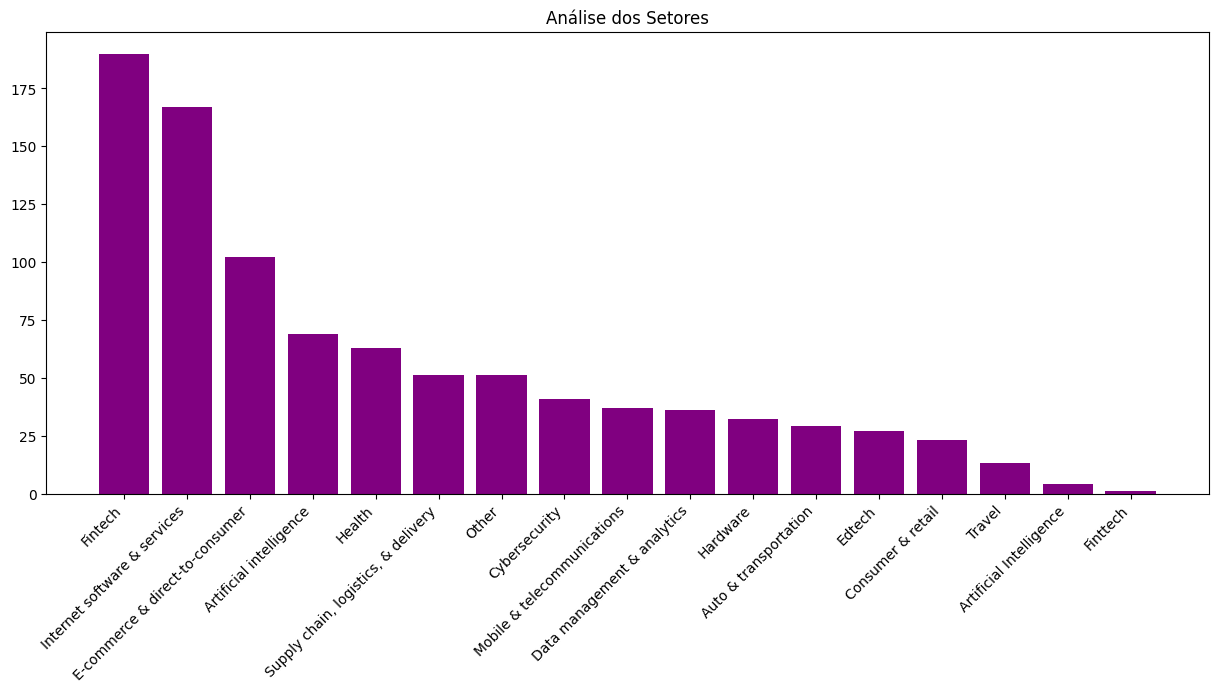

In [16]:
# Análise gráfica dos setores
plt.figure(figsize=(15,6))
plt.title('Análise dos Setores')
plt.bar(dados['Setor'].value_counts().index, dados['Setor'].value_counts(), color='purple')
plt.xticks(rotation=45, ha='right');

In [17]:
# Ranking dos valores únicos da coluna País (em porcentagem)
dados['País'].value_counts(normalize=True)

United States           0.509615
China                   0.180556
India                   0.054487
United Kingdom          0.039530
Germany                 0.024573
Israel                  0.022436
France                  0.020299
Canada                  0.016026
Brazil                  0.016026
South Korea             0.011752
Singapore               0.011752
Hong Kong               0.007479
Japan                   0.006410
Australia               0.006410
Mexico                  0.005342
Netherlands             0.005342
Indonesia               0.004274
Spain                   0.004274
Sweden                  0.004274
Switzerland             0.004274
Ireland                 0.003205
United Arab Emirates    0.003205
Norway                  0.003205
Belgium                 0.002137
Thailand                0.002137
Denmark                 0.002137
Philippines             0.002137
Finland                 0.002137
Colombia                0.002137
South Africa            0.002137
Turkey    

In [18]:
analise_paises = round (dados['País'].value_counts(normalize=True) * 100, 1)
analise_paises

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

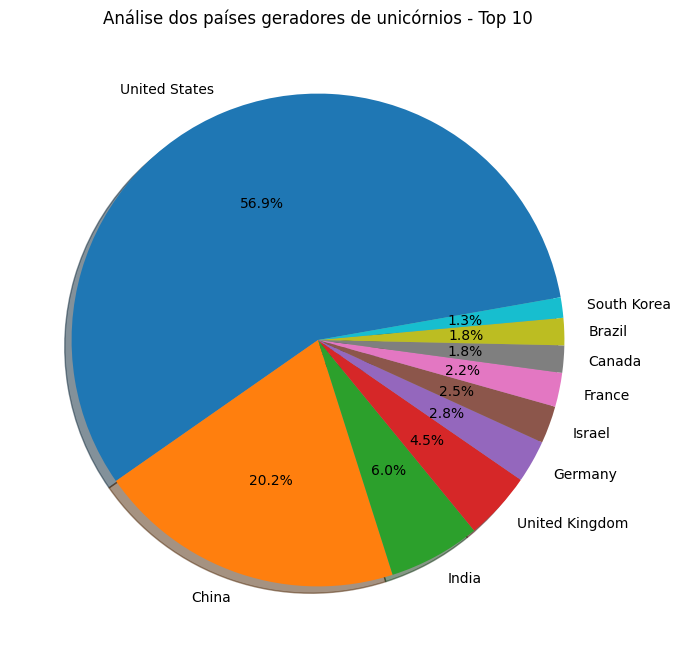

In [19]:
# Plot dos Top 10 países geradores de unicórnios
plt.figure(figsize=(15,8))
plt.title('Análise dos países geradores de unicórnios - Top 10', loc='center')
plt.pie(
    analise_paises.head(10),
    labels=analise_paises.index[0:10],
    shadow=True,
    startangle=10,
    autopct='%1.1f%%'
);

In [20]:
# Modificação do tipo de informação da coluna Data de Adesão (de objeto para datetime)
dados['Data de Adesão'] = pd.to_datetime(dados['Data de Adesão'])
dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [21]:
# Extração do Ano e Mês
dados['Mês'] = pd.DatetimeIndex(dados['Data de Adesão']).month
dados['Ano'] = pd.DatetimeIndex(dados['Data de Adesão']).year
dados.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [22]:
# Tabela analítica
tabela1 = dados.groupby( by=['País', 'Ano', 'Mês', 'Empresa'] ).count()['Id'].reset_index()
tabela1

,País,Ano,Mês,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [24]:
# Empresas que se tornaram unicórnios no Brasil
tabela1.loc[tabela1['País'] == 'Brazil']

,País,Ano,Mês,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [25]:
# Modificação do tipo de informação da coluna Valor (de objeto para float)
dados['Valor ($)'] = pd.to_numeric(dados['Valor ($)'].apply(lambda linha: linha.replace('$', '')))
dados.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [26]:
# Tabela analítica
tabela2 = dados.groupby(by=['País']).sum()['Valor ($)'].reset_index()
tabela2.head()

,País,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [27]:
# Tabela ordenada pela coluna Valor em ordem decrescente
tabela2_ordenada = tabela2.sort_values('Valor ($)', ascending=False)
tabela2_ordenada.head()

,País,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


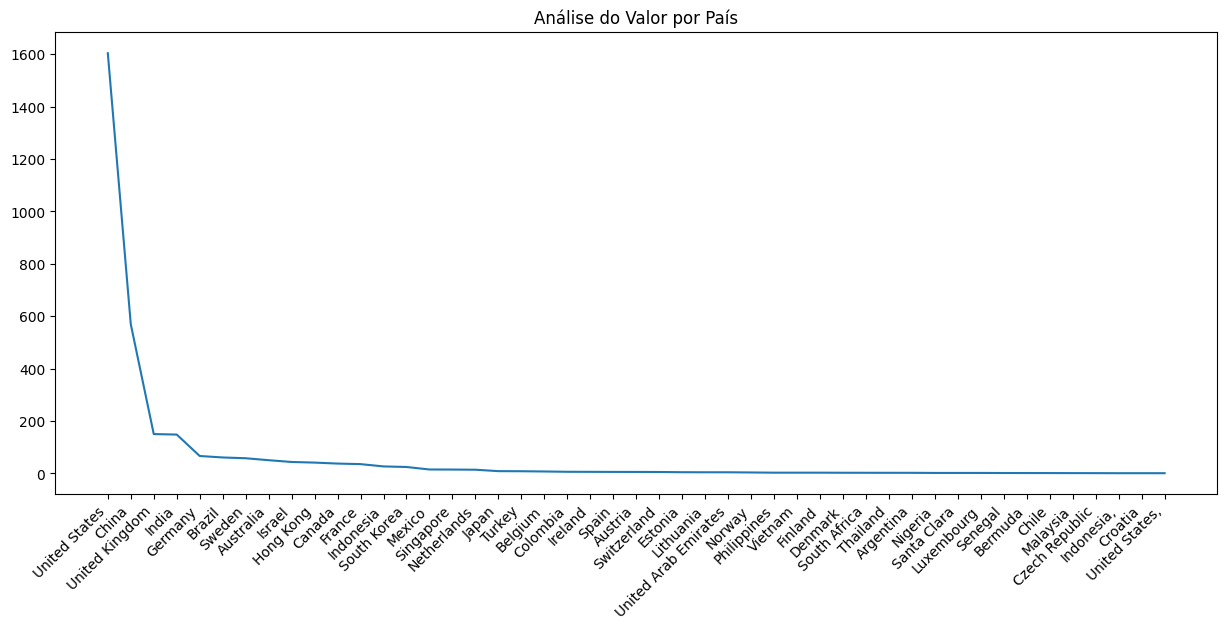

In [29]:
# Análise gráfica dos valores de acordo com cada país
plt.figure(figsize=(15,6))
plt.plot(tabela2_ordenada['País'], tabela2_ordenada['Valor ($)'])
plt.title('Análise do Valor por País')
plt.xticks(rotation=45, ha='right');

No caso do Brasil, através das análises, pôde-se perceber que ele ocupa posições diferentes nos rankings referentes ao valuation e o número de unicórnios gerados por cada país. Assim, conclui-se que, apesar dele possuir um número menor de unicórnios, os mesmos conseguem gerar um valuation maior, comparado à França, por exemplo, a qual possui um número maior de unicórnios em relação ao Brasil.